In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
learning_rate = 0.01
learning_epoch = 50

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33 + 5

train_loss = np.zeros(learning_epoch)

In [27]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Added w[1] as bias
def model(X, w):
    return tf.add(tf.multiply(X,w[0]),w[1])

w = tf.Variable([0.0,0.0], name="weights")

y_model = model(X,w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(learning_epoch):
    for (x,y) in zip(x_train,y_train):
        _, train_loss[epoch] = sess.run([train_op, cost], feed_dict={X: x, Y: y})
        
w_val = sess.run(w)
sess.close()

In [29]:
print(w_val)
print(train_loss[1:10])

[1.9544848 4.978007 ]
[1.64122891 0.72634488 0.43365264 0.31758484 0.26618052 0.24197637
 0.23019132 0.22434972 0.22142589]


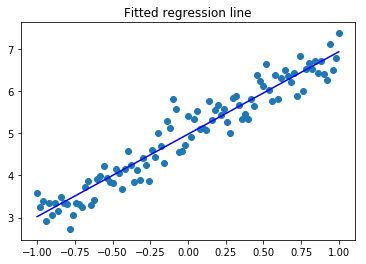

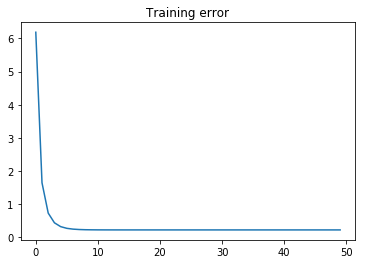

In [30]:
plt.title("Fitted regression line")
plt.scatter(x_train,y_train)
y_learned = x_train * w_val[0]
# With bias added
plt.plot(x_train,y_learned + w_val[1], 'b')
plt.show()

plt.title("Training error")
plt.plot(range(len(train_loss)),train_loss)
plt.show()